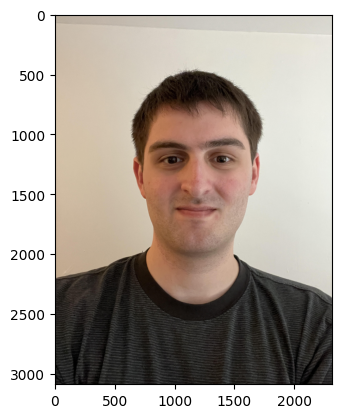

In [1]:
#import image 

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('face.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)



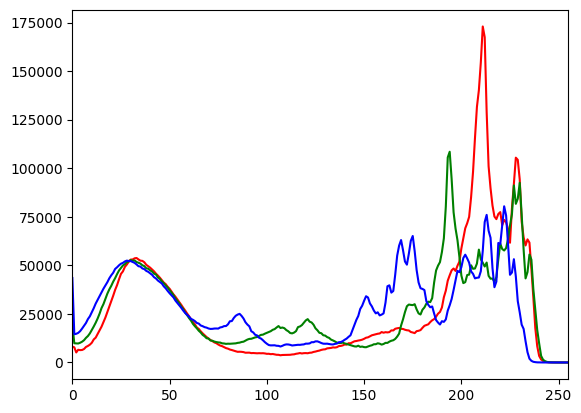

In [2]:
#create color histogram 

#red
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist, color='red')
plt.xlim([0,256])

#green
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist, color='green')
plt.xlim([0,256])

#blue
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist, color='blue')

plt.xlim([0,255])
plt.show()

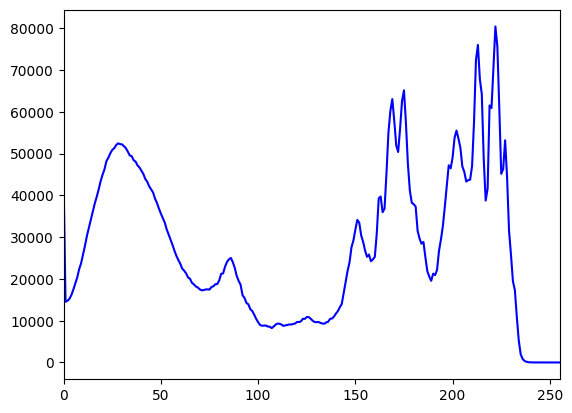

In [3]:
#contrast histogram

plt.plot(hist, color='blue')
plt.xlim([0,255])
plt.show()




In [4]:
#adjust brightness and contrast 


#method for adjusting contrast (method from brightness/contrast module)
def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')
    
    # Adjust contrast
    temp *= alpha
    
    # Adjust brightness
    temp += beta
    
    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)
    
    return temp.astype('uint8')




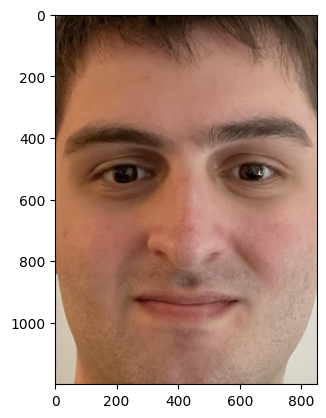

In [5]:
#create mask of face

#create rectangle for masking 
#rectangle = cv2.rectangle(img, (750,700), (1600,1900), (0,0,255), 3) 

#plt.imshow(rectangle) #used to check rectangle dimensions 

#black out rest of image 
imgMasked = img[700:1900, 750:1600]
plt.imshow(imgMasked)







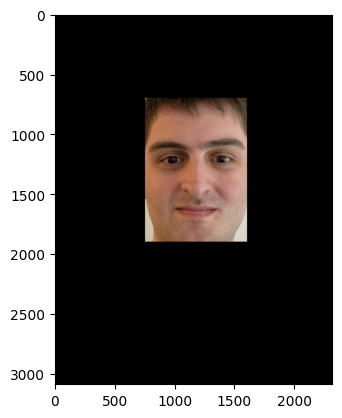

In [6]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[700:1900, 750:1600] = 255

fullMask = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(fullMask)

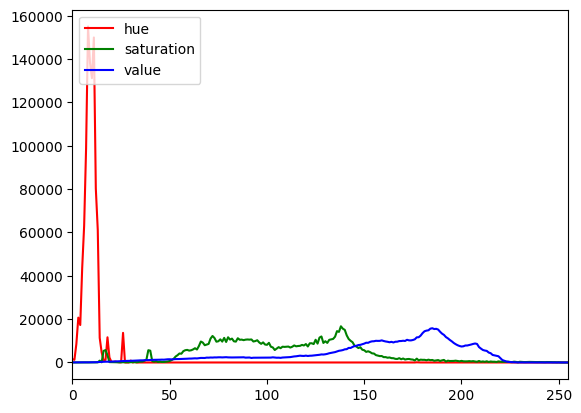

In [7]:
#histogram of masked image

# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()




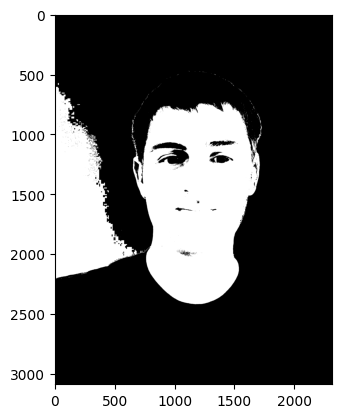

In [8]:
# cv2.inRange()

min_hsv = np.uint8([0,50,100])
max_hsv = np.uint8([25,175,225])

mask = cv2.inRange(img,min_hsv,max_hsv)
plt.imshow(mask, cmap="gray")

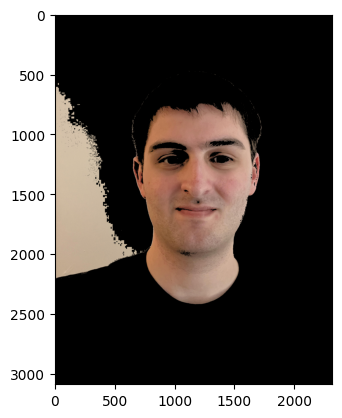

In [9]:
img_masked = cv2.bitwise_and(img,img,mask=mask)

img_masked = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)

plt.imshow(img_masked)
